In [ ]:
#running sync
import time

start = time.perf_counter()


def do_something():
    print('Sleeping 1 second(s)...')
    time.sleep(1)
    print('Done Sleeping...')

do_something()
do_something()

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 1 second(s)...
Done Sleeping...
Sleeping 1 second(s)...
Done Sleeping...
Finished in 2.02 second(s)


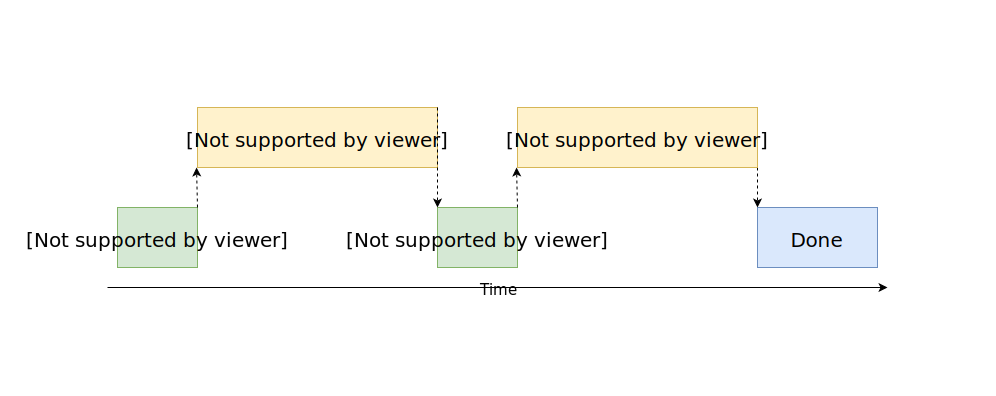

In [ ]:
#Without threading
from IPython.display import SVG
SVG("multiprocessing-1.svg")

The above code runs synchronusly and we can't use CPU resouces to full efficiency.
- CPU bound tasks are things that are crunching a lot of numbers and using the CPU and 
- the i/o bound tasks are things that are just waiting for input and output operations to be completed and not really using the CPU all that much. So some other examples of i/o bound tasks include you know reading and writing from the file system and other file system operations network operations downloading stuff online and things like that.
- Use threading if you have I/O bound jobs.


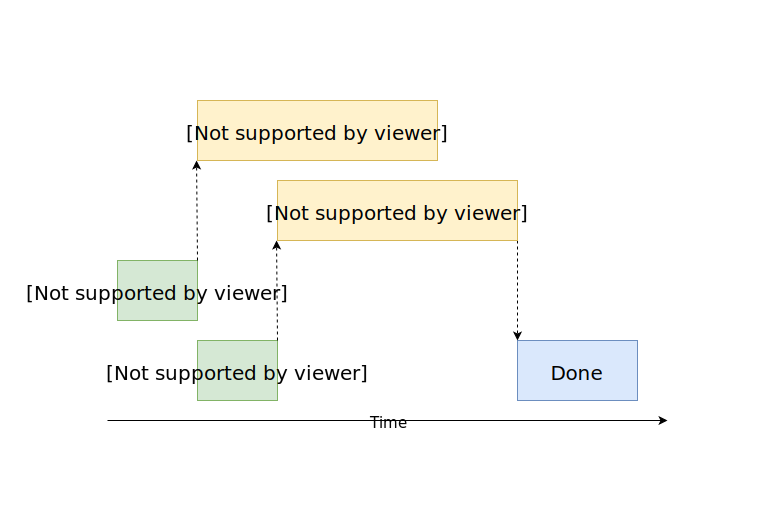

In [ ]:
#With threading
from IPython.display import SVG
SVG("threading-2.svg")

In [ ]:
#running async - Snippet 2
import threading
import time

start = time.perf_counter()


def do_something():
    print('Sleeping 1 second(s)...')
    time.sleep(1)
    print('Done Sleeping...')

t1 = threading.Thread(target=do_something)
t2 = threading.Thread(target=do_something)

t1.start()
t2.start()

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 1 second(s)...
Sleeping 1 second(s)...Finished in 0.02 second(s)

Done Sleeping...Done Sleeping...



In [ ]:
#running async - Snippet 3
import threading
import time

start = time.perf_counter()


def do_something():
    print('Sleeping 1 second(s)...')
    time.sleep(1)
    print('Done Sleeping...')

t1 = threading.Thread(target=do_something)
t2 = threading.Thread(target=do_something)

t1.start()
t2.start()

t1.join()
t2.join()

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 1 second(s)...
Sleeping 1 second(s)...
Done Sleeping...
Done Sleeping...
Finished in 1.02 second(s)


In [ ]:
#running async - Snippet 4
import threading
import time

start = time.perf_counter()


def do_something():
    print('Sleeping 1 second(s)...')
    time.sleep(1)
    print('Done Sleeping...')

threads = []
for _ in range(10):
    t = threading.Thread(target=do_something)
    t.start()
    threads.append(t)

#Because we can't go .join() within above for loop because it would lead to problem as in Snippet 2
for t in threads:
    t.join()
    

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 1 second(s)...Sleeping 1 second(s)...

Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...Done Sleeping...

Done Sleeping...
Done Sleeping...
Done Sleeping...
Finished in 1.08 second(s)


In [ ]:
# Above implementation doesn't accept arguments - Snippet 5
import threading
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    print('Done Sleeping...')

threads = []
for _ in range(10):
    t = threading.Thread(target=do_something,args=[1.5])
    t.start()
    threads.append(t)

#Because we can't go .join() within above for loop because it would lead to problem as in Snippet 2
for t in threads:
    t.join()
    

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Done Sleeping...Done Sleeping...
Done Sleeping...

Done Sleeping...
Done Sleeping...Done Sleeping...Done Sleeping...
Done Sleeping...


Done Sleeping...Done Sleeping...

Finished in 1.55 second(s)


In [ ]:
# More efficent way of implementation - Snippet 6
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return 'Done Sleeping...'

with concurrent.futures.ThreadPoolExecutor() as executor:
    f1=executor.submit(do_something, 1) #used if function has to be executed once. It schedules the function to be executed and returns a future object.
    f2=executor.submit(do_something, 1)
    print(f1.result())
    print(f2.result())

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')



Sleeping 1 second(s)...
Sleeping 1 second(s)...
Done Sleeping...
Done Sleeping...
Finished in 1.02 second(s)


In [ ]:
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return 'Done Sleeping...'


with concurrent.futures.ThreadPoolExecutor() as executor:
    results =[executor.submit(do_something, 1) for _ in range(10)]

    for f in concurrent.futures.as_completed(results):
        print(f.result())


finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Done Sleeping...
Finished in 1.07 second(s)


In [ ]:
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping {seconds} seconds...'


with concurrent.futures.ThreadPoolExecutor() as executor:
    secs = [5,4,3,2,1]
    results =[executor.submit(do_something, sec) for sec in secs]

    for f in concurrent.futures.as_completed(results):
        print(f.result())


finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 5 second(s)...
Sleeping 4 second(s)...Sleeping 3 second(s)...

Sleeping 2 second(s)...
Sleeping 1 second(s)...
Done Sleeping 1 seconds...
Done Sleeping 2 seconds...
Done Sleeping 3 seconds...
Done Sleeping 4 seconds...
Done Sleeping 5 seconds...
Finished in 5.02 second(s)


5 sec thread started first but due ti as_completed, the ouput is printed in order in which the threads completed

In [ ]:
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping {seconds} seconds...'

with concurrent.futures.ThreadPoolExecutor() as executor:
    secs = [5, 4, 3, 2, 1]
    results = executor.map(do_something, secs)

    for result in results:
        print(result)



finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 5 second(s)...
Sleeping 4 second(s)...
Sleeping 3 second(s)...
Sleeping 2 second(s)...
Sleeping 1 second(s)...
Done Sleeping 5 seconds...
Done Sleeping 4 seconds...
Done Sleeping 3 seconds...
Done Sleeping 2 seconds...
Done Sleeping 1 seconds...
Finished in 5.02 second(s)


In [1]:
import requests
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79'
]

t1 = time.perf_counter()


def download_image(img_url):
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')


with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(download_image, img_urls)


t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
Finished in 35.19724760000001 seconds


In [32]:
import requests
import time

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79'
]

t1 = time.perf_counter()


for img_url in img_urls:
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
Finished in 79.03872050000018 seconds
